<h1>Fraud Detection Machine Learning Project</h1>

<p>
A complete, end-to-end fraud detection project designed for a data science portfolio. This project demonstrates real-world ML skills including EDA, preprocessing, handling imbalanced data, model training, evaluation, and explainability (SHAP).
</p>

<h3>Project Overview</h3>
<p>
Credit card fraud is a critical problem for financial institutions, where fraudulent cases are extremely rare compared to legitimate transactions. This project builds and evaluates machine learning models to detect fraudulent transactions.

Goal:
Predict whether a transaction is fraudulent (Class = 1) or legitimate (Class = 0).

Key Challenges:

Strong class imbalance (fraud is <1%)

Need models with high recall on fraud class

Avoid excessive false positives
</p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
%matplotlib inline

<h1>Dataset</h1>
<p>
This project uses the popular Credit Card Fraud Detection dataset.

Features include:

PCA-transformed components: V1 to V28

Amount (scaled)

Time (scaled)

Target variable: Class
</p>

In [61]:
fraud = pd.read_csv("fraud/creditcard.csv")
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Datasets information
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Statistical Summary of Each Numerical Columns
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Subseting Duplicated Values from Datasets
fraud[fraud.duplicated() == True] # Check for duplicated Columns

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


<h3>Data Preprocessing</h3>
<p>
Steps applied:

1. Handling Missing Values

Dataset contains no missing values.

2. Scaling Numerical Features

Amount and Time were standardized using StandardScaler.

3. Separating Features and Target
X = df.drop('Class')
y = df['Class']
4. Train-Test Split

Stratified split ensures class balance in both sets.

test_size = 0.2
stratify=y

5. Handling Class Imbalance (SMOTE)

A synthetic oversampling method used to balance the fraud class
</p>

In [8]:
# Drop duplicated columns
fraud.drop_duplicates(inplace = True)
fraud.shape

(283726, 31)

In [9]:
# Fraud vs Non‐fraud counts
class_0 = fraud["Class"].value_counts()[0]
class_1 = fraud["Class"].value_counts()[1]

total = class_0 + class_1

pct_class_0 = class_0 / total * 100
pct_class_1 = class_1 / total * 100
# Output Percentage of each classes
print("Percentage of Class 0: {}".format(pct_class_0))
print("Percentage of Class 1: {}".format(pct_class_1))

# Fraud Rate
fraud_rate = class_1 / 100
# Output the Percentage of Fraud Rate
print("Fraud Rate: {}%".format(fraud_rate))

Percentage of Class 0: 99.83328986416473
Percentage of Class 1: 0.1667101358352777
Fraud Rate: 4.73%


In [10]:
# Calculates the 25th quartile and 75th quartile for "Amount" column
Q1 = fraud["Amount"].quantile(.25)
Q3 = fraud["Amount"].quantile(.75)

# Inter-Quantile Range
IQR = Q3 - Q1
# Defining Bounds for Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier
outlier = fraud.loc[(fraud["Amount"] < lower_bound) | (fraud["Amount"] > upper_bound)]
# Output the length of Outlier 
print("Length of Outlier: {}".format(len(outlier)))

Length of Outlier: 31685


In [11]:
# Winsorization Method: Replacing outliers values with nearest values
fraud["Amount"] = fraud["Amount"].clip(lower=lower_bound, upper=upper_bound)
# Outlier
outlier = fraud.loc[(fraud["Amount"] < lower_bound) | (fraud["Amount"] > upper_bound)]
# Output the length of Outlier 
print("Length of Outlier: {}".format(len(outlier)))

Length of Outlier: 0


<h1>Exploratory Data Analysis (EDA)</h1>

<p>
EDA includes:
    
Class distribution plot

Transaction Amount distribution

Time distribution

Correlation heatmap of PCA components

These visualizations help understand patterns and dataset structure.
</p>

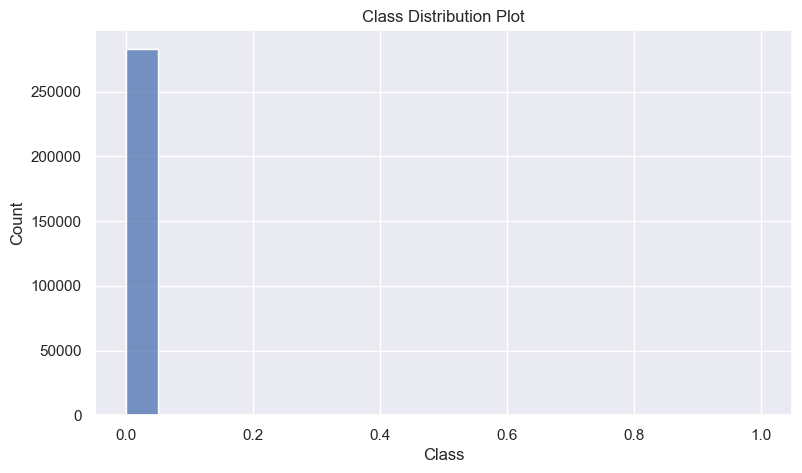

In [12]:
plt.figure(figsize=(9, 5))
sns.histplot(fraud, x = "Class")
plt.title("Class Distribution Plot");

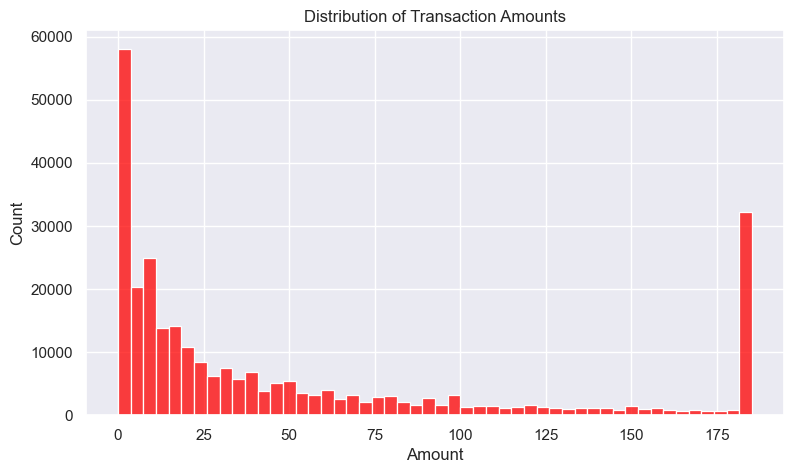

In [13]:
plt.figure(figsize=(9,5))
sns.histplot(fraud, x = "Amount", bins = 50, color="red")
plt.title("Distribution of Transaction Amounts");

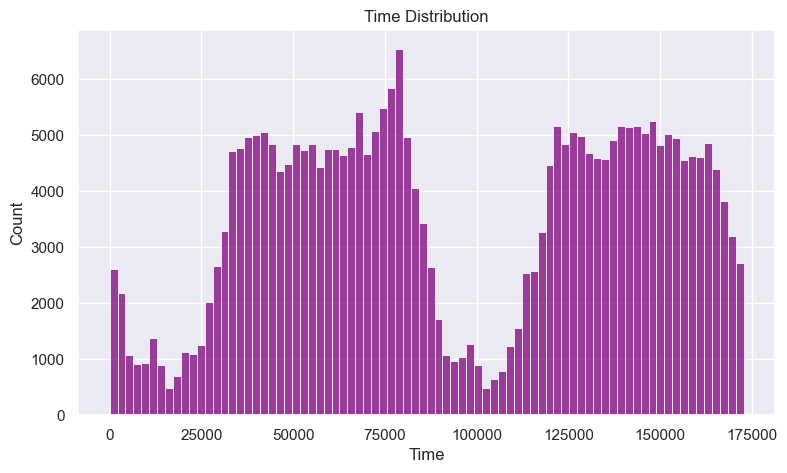

In [14]:
plt.figure(figsize=(9,5))
sns.histplot(fraud, x = "Time", bins=80, color="purple")
plt.title("Time Distribution");

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = fraud.drop(columns = ["Class"])
y = fraud["Class"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3,stratify = y, random_state = 42)
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

X_train Shape: (198608, 30)
X_test Shape: (85118, 30)


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(random_state= 42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("X_train_resampled shape: {}".format(X_train_res.shape))

X_train_resampled shape: (396554, 30)


<h1>Machine Learning Models</h1>
<p>
Three models were trained and compared:

1. Logistic Regression (Baseline Model)

Linear baseline

Interpretable

Uses class weights for imbalance

2. Random Forest Classifier

Non-linear model

Handles imbalanced data well

Feature importance supported

3. XGBoost

High-performance boosting model

Excellent for structured data
</p>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [21]:
log_model = LogisticRegression(max_iter=10000)
rfc_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier(
    n_estimators= 300,
    max_depth= 5, 
    learning_rate= .06
)

In [22]:
log_model.fit(X_train_res, y_train_res)
rfc_model.fit(X_train_res, y_train_res)
xgb_model.fit(X_train_res, y_train_res)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [23]:
log_y_pred = log_model.predict(X_test)
rfc_y_pred = rfc_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
print("Logistic Regression Prediction: {}".format(log_y_pred))
print("RandomForest Classifier Prediction: {}".format(rfc_y_pred))
print("XGBoost Classifier Prediction: {}".format(xgb_y_pred))

Logistic Regression Prediction: [0 0 0 ... 0 0 0]
RandomForest Classifier Prediction: [0 0 0 ... 0 0 0]
XGBoost Classifier Prediction: [0 0 0 ... 0 0 0]


<h3>Model Evaluation</h3>

Models are evaluated using:

- Precision-Recall Curve

- ROC-AUC Score

- Average Precision Score

- Confusion Matrix

- Classification Report

In [24]:
from sklearn.metrics import (
confusion_matrix, 
classification_report,
roc_curve, 
auc, 
precision_recall_curve,
average_precision_score
)

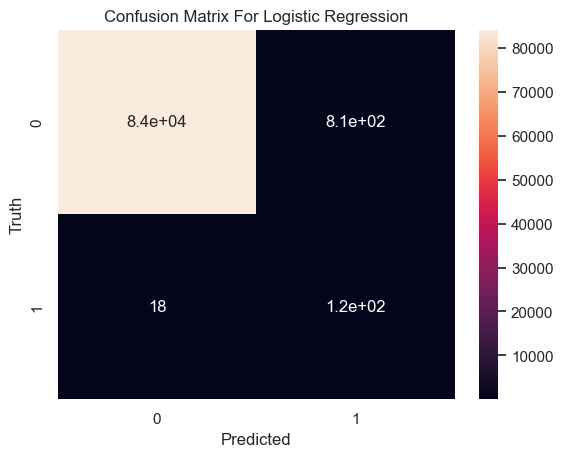

In [25]:
log_cm = confusion_matrix(y_test, log_y_pred)

sns.heatmap(log_cm, annot=True)
plt.title("Confusion Matrix For Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Truth");

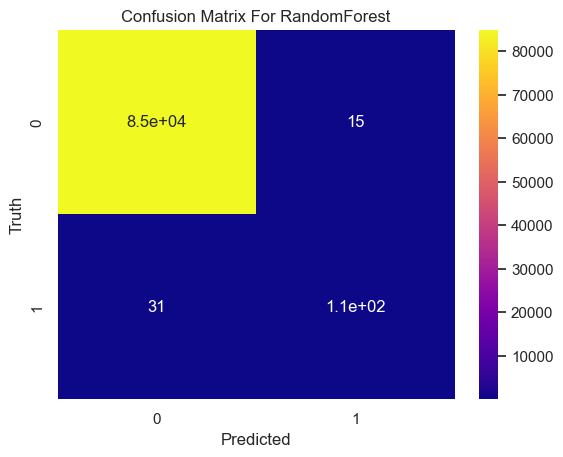

In [26]:
rfc_cm = confusion_matrix(y_test, rfc_y_pred)

sns.heatmap(rfc_cm, annot=True, cmap = "plasma")
plt.title("Confusion Matrix For RandomForest")
plt.xlabel("Predicted")
plt.ylabel("Truth");

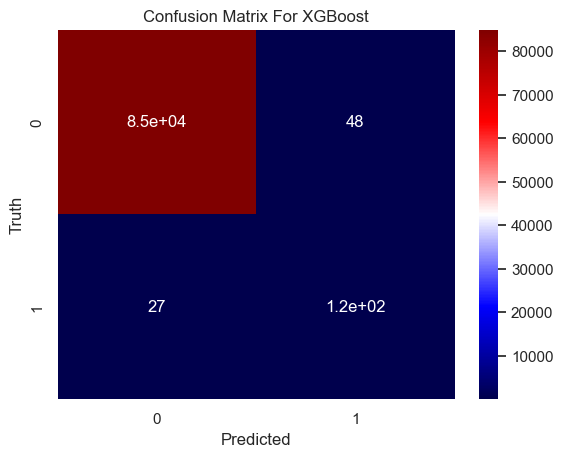

In [27]:
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

plt.title("Confusion Matrix For XGBoost")
sns.heatmap(xgb_cm, annot = True, cmap = "seismic")
plt.xlabel("Predicted")
plt.ylabel("Truth");

In [28]:
def statement_symbol(sym, title, value):
    print(sym*value, title, sym*value)

In [29]:
# Classification Report for Logistic Regression
statement_symbol("=", "Logistic Regression Classification Report",10)
log_report = classification_report(y_test, log_y_pred, output_dict= True)
pd.DataFrame(log_report).round(4)

========== Logistic Regression Classification Report ==========


,0,1,accuracy,macro avg,weighted avg
precision,0.9998,0.1322,0.9902,0.5660,0.9983
recall,0.9904,0.8732,0.9902,0.9318,0.9902
f1-score,0.9951,0.2296,0.9902,0.6124,0.9938
support,84976.0000,142.0000,0.9902,85118.0000,85118.0000


In [30]:
# Classification Report for RandomForest
statement_symbol("=", "RandomForest Classification Report",13)
rfc_report = classification_report(y_test, rfc_y_pred, output_dict= True)
pd.DataFrame(rfc_report).round(4)

============= RandomForest Classification Report =============


,0,1,accuracy,macro avg,weighted avg
precision,0.9996,0.8810,0.9995,0.9403,0.9994
recall,0.9998,0.7817,0.9995,0.8908,0.9995
f1-score,0.9997,0.8284,0.9995,0.9140,0.9994
support,84976.0000,142.0000,0.9995,85118.0000,85118.0000


In [31]:
# Classification Report for XGBoost
statement_symbol("=", "XGBoost Classifier Classification Report",10)
xgb_report = classification_report(y_test, xgb_y_pred, output_dict= True)
pd.DataFrame(xgb_report).round(4)

========== XGBoost Classifier Classification Report ==========


,0,1,accuracy,macro avg,weighted avg
precision,0.9997,0.7055,0.9991,0.8526,0.9992
recall,0.9994,0.8099,0.9991,0.9046,0.9991
f1-score,0.9996,0.7541,0.9991,0.8768,0.9991
support,84976.0000,142.0000,0.9991,85118.0000,85118.0000


In [32]:
log_pred_proba = log_model.predict_proba(X_test)[:, 1]
rfc_pred_proba = rfc_model.predict_proba(X_test)[:, 1]
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Predicted Probabilty: {}".format(log_pred_proba))
print("RandomForset Classifier Predicted Probabilty: {}".format(rfc_pred_proba))
print("XGBoost Classifier Predicted Probabilty: {}".format(xgb_pred_proba))

Logistic Regression Predicted Probabilty: [0.00033825 0.00387011 0.00529225 ... 0.04491514 0.02052984 0.00312671]
RandomForset Classifier Predicted Probabilty: [0. 0. 0. ... 0. 0. 0.]
XGBoost Classifier Predicted Probabilty: [5.2699295e-05 6.0184146e-05 1.1113049e-04 ... 1.0513088e-03 4.3510812e-05
 7.0980066e-05]


<h4>ROC CURVE FOR LOGISTIC REGRESSION</h4>

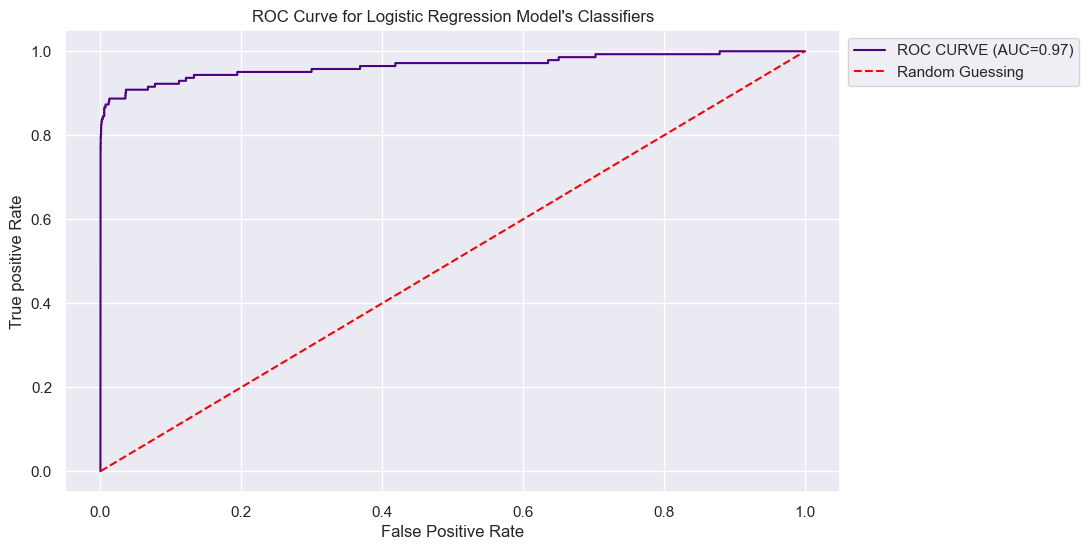

In [33]:
# Calculating False +ve Rate, True +ve Rate, and Thresholds Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, log_pred_proba)
log_roc_auc_score = auc(fpr, tpr) # Calculating the Area Under Curve

# plots
plt.figure(figsize=(10, 6))
plt.plot(
    fpr, 
    tpr, 
    color= "indigo", 
    label = "ROC CURVE (AUC={:.2f})".format(log_roc_auc_score)
) # ROC Plot
plt.plot(
    [0, 1], 
    [0, 1], 
    color= "red",
    ls="--",
    label = "Random Guessing"
) # AUC Plot
plt.title("ROC Curve for Logistic Regression Model's Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.legend(bbox_to_anchor = (1, 1));

<h4>PRECISION RECALL CURVE FOR LOGISTIC REGRESSION</h4>

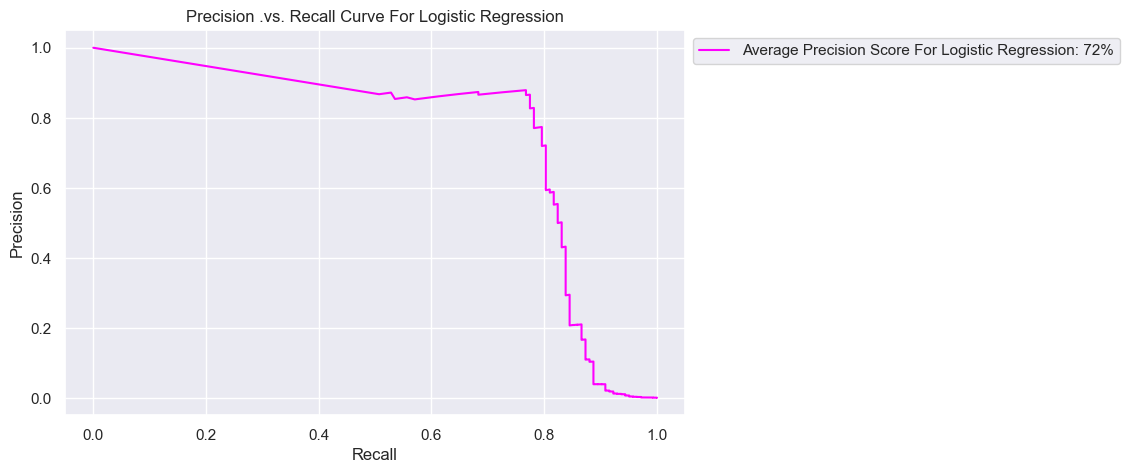

In [34]:
precision, recall, thresholds = precision_recall_curve(y_test, log_pred_proba)
log_avg_precision_score = average_precision_score(y_test, log_pred_proba)

plt.figure(figsize= (8, 5))
plt.plot(
    recall, 
    precision, 
    color = "magenta",
    label = (
        "Average Precision Score For Logistic Regression: {:.0f}%"
            .format(log_avg_precision_score*100)
    )
)
plt.title("Precision .vs. Recall Curve For Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor = (1, 1), loc=2);

<h4>ROC CURVE FOR RANDOMFOREST CLASSIFIER</h4>

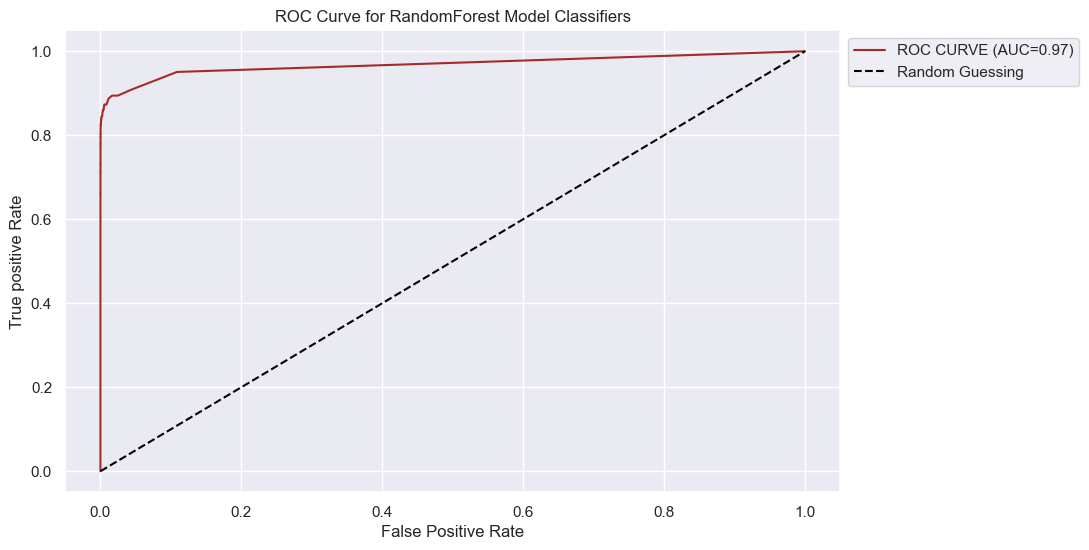

In [35]:
# Calculating False +ve Rate, True +ve Rate, and Thresholds for RandomForest
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred_proba)
rfc_roc_auc_score = auc(fpr, tpr) # Calculating the Area Under Curve

# plots
plt.figure(figsize=(10, 6))
plt.plot(
    fpr, 
    tpr, 
    color= "brown", 
    label = "ROC CURVE (AUC={:.2f})".format(rfc_roc_auc_score)
) # ROC Plot
plt.plot(
    [0, 1], 
    [0, 1], 
    color= "black",
    ls="--",
    label = "Random Guessing"
) # AUC Plot
plt.title("ROC Curve for RandomForest Model Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.legend(bbox_to_anchor = (1, 1));

<h4>PRECISION RECALL CURVE FOR RANDOMFOREST CLASSIFIER</h4>

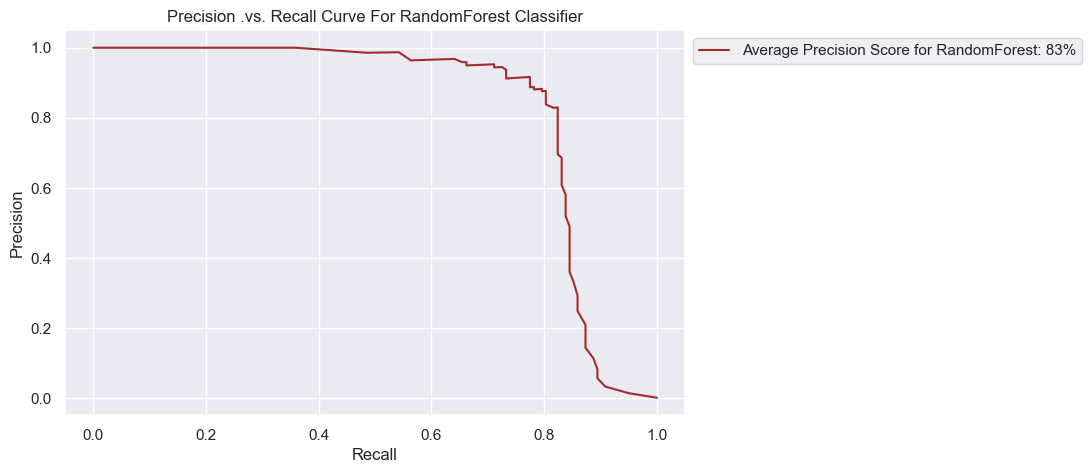

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test, rfc_pred_proba)
rfc_avg_precision_score = average_precision_score(y_test, rfc_pred_proba)

plt.figure(figsize= (8, 5))
plt.plot(
    recall, 
    precision, 
    color = "brown", 
    label = (
        "Average Precision Score for RandomForest: {:.0f}%"
            .format(rfc_avg_precision_score*100)
    )
)
plt.title("Precision .vs. Recall Curve For RandomForest Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1, 1), loc = 2);

<h4>RECEIVER OPERATIONAL CHARACTERISTICS CURVE FOR XGBOOST CLASSIFIER</h4>

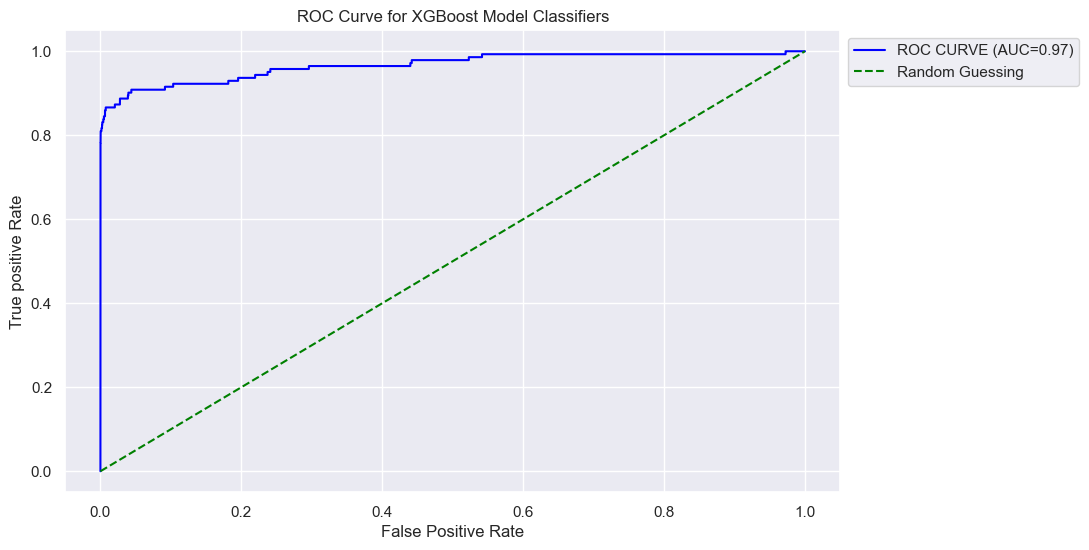

In [37]:
# Calculating False +ve Rate, True +ve Rate, and Thresholds for XGBoost
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba)
xgb_roc_auc_score = auc(fpr, tpr) # Calculating the Area Under Curve

# plots
plt.figure(figsize=(10, 6))
plt.plot(
    fpr, 
    tpr, 
    color= "blue", 
    label = "ROC CURVE (AUC={:.2f})".format(xgb_roc_auc_score)
) # ROC Plot
plt.plot(
    [0, 1], 
    [0, 1], 
    color= "green",
    ls="--",
    label = "Random Guessing"
) # AUC Plot
plt.title("ROC Curve for XGBoost Model Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.legend(bbox_to_anchor = (1, 1));

<h4>PRECISION RECALL CURVE FOR EXTREME GRADIENT BOOSTING CLASSIFIER</h4>

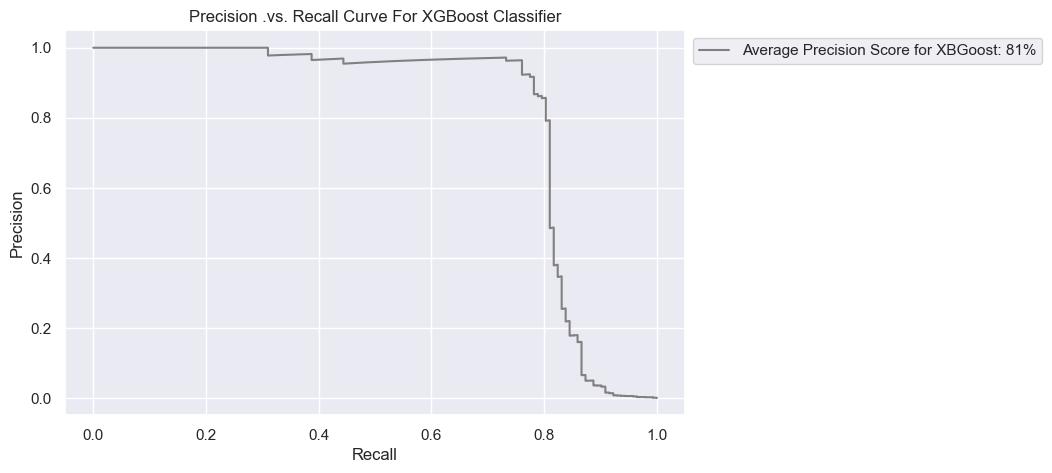

In [38]:
# Defining varaibles for plot
precision, recall, thresholds = precision_recall_curve(y_test, xgb_pred_proba)
xgb_avg_precision_score = average_precision_score(y_test, xgb_pred_proba)

# Plotting precision VS recall curve for XGBoost
plt.figure(figsize= (8, 5))
plt.plot(
    recall, 
    precision, 
    color = "grey",
    label = (
         "Average Precision Score for XBGoost: {:.0f}%"
             .format(xgb_avg_precision_score*100)
    ) 
)
plt.title("Precision .vs. Recall Curve For XGBoost Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1, 1),loc=2);

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
param_grids = dict(
    n_estimators = [100, 200, 300],
    max_depth = [5, 15, 20],
    learning_rate = [0.02, 0.04, 0.06]
)
clf = RandomizedSearchCV(xgb_model, param_grids, n_iter = 4)
clf.fit(X_train_res, y_train_res)
clf.best_params_

{'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.02}

In [41]:
print("Best Score: {}".format(clf.best_score_))

Best Score: 0.9996620890802441


<h3>Feature Importance & Model Explainability</h3>
<p>This explains each model's output by calculating the shap values for each machine learning model's and datasets.</p>

In [42]:
import shap

<h4>LOGISTIC REGRESSION SHAP INTERPRETATION</h4>

In [43]:
log_explainer = shap.Explainer(log_model, X_train_res)
log_shap_values = log_explainer.shap_values(X_test)

In [44]:
shap.initjs()

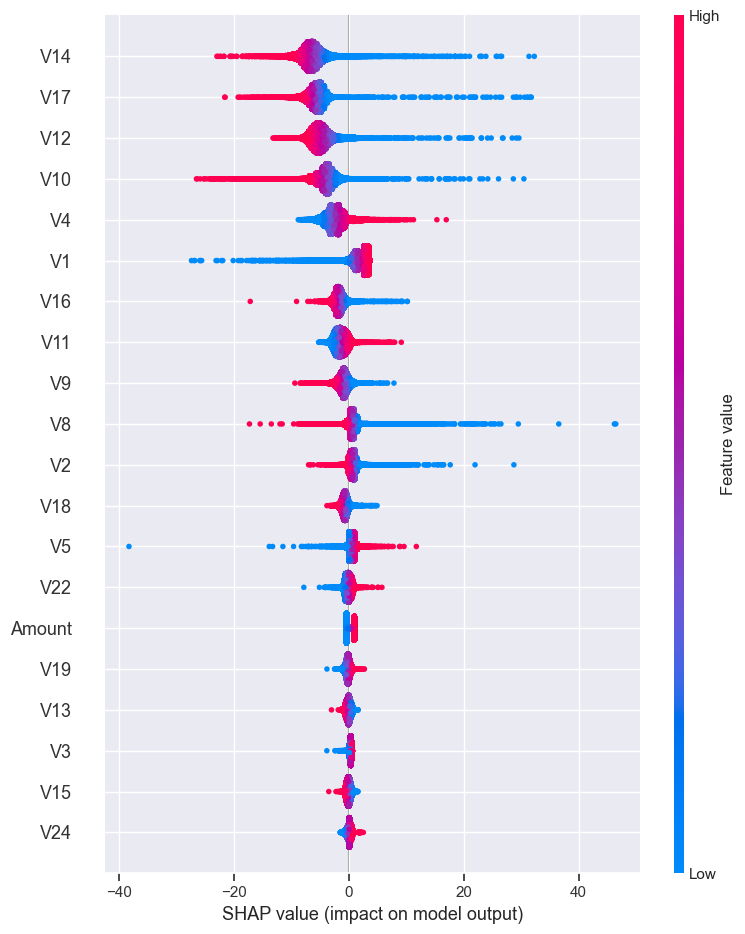

In [45]:
shap.summary_plot(log_shap_values, X_test)

In [46]:
statement_symbol("*", "EXPLANATION OF SINGLE ROW PREDICTIONS LOGISTIC REGRESSION", 33)
shap.force_plot(log_explainer.expected_value, log_shap_values[0], X_test.iloc[0]) # Single row explanation

********************************* EXPLANATION OF SINGLE ROW PREDICTIONS LOGISTIC REGRESSION *********************************


**************** LOGISTIC REGRESSIOIN SHAP BAR CHART EXPLANATION FOR EACH FEATURES IMPORTANCE ****************


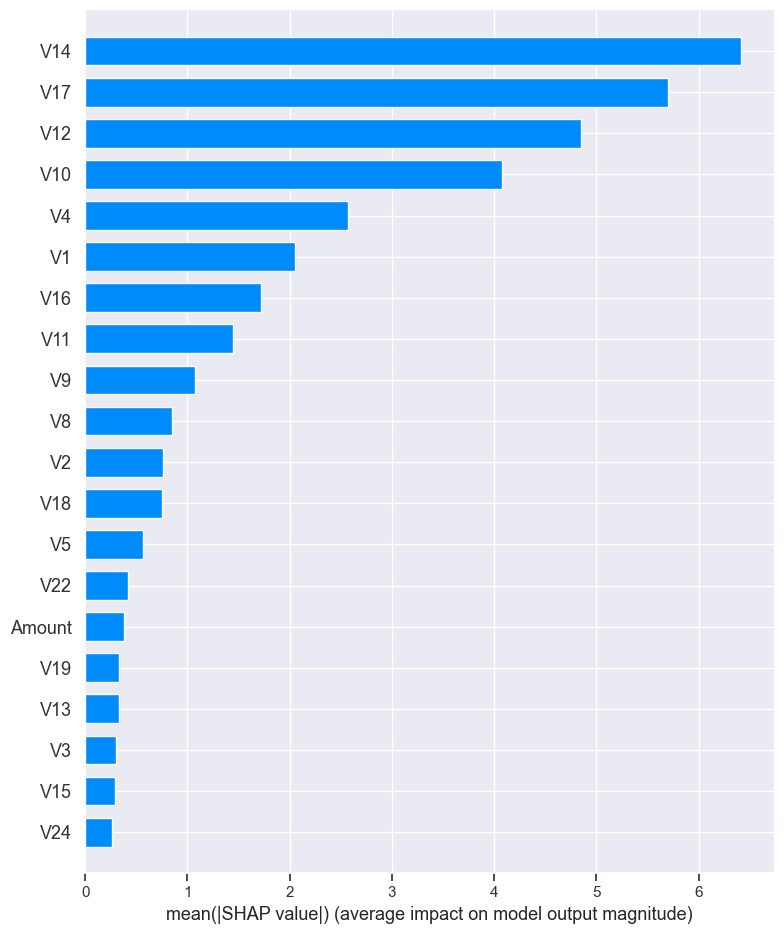

In [47]:
statement_symbol("*", "LOGISTIC REGRESSIOIN SHAP BAR CHART EXPLANATION FOR EACH FEATURES IMPORTANCE", 16)
shap.summary_plot(log_shap_values, X_test, plot_type = "bar")

<h4>XGBOOST SHAP INTERPRETATION</h4>

In [48]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

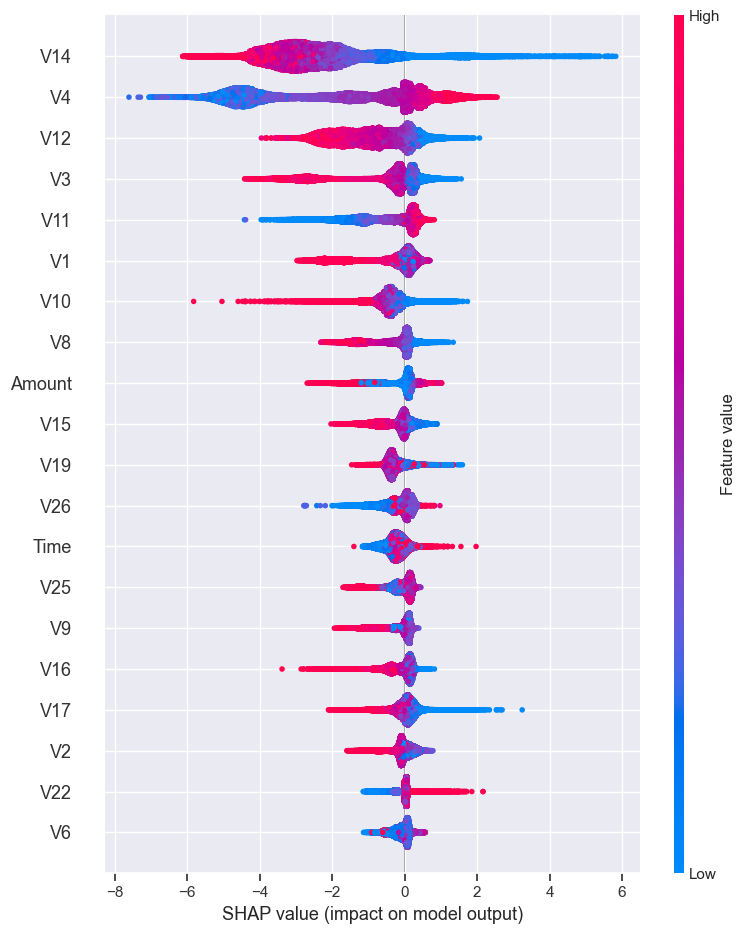

In [49]:
shap.summary_plot(shap_values, X_test)

In [50]:
statement_symbol("*", "EXPLANATION OF SINGLE ROW PREDICTIONS (XGBoost)", 37)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0]) # Explains individual predictions

************************************* EXPLANATION OF SINGLE ROW PREDICTIONS (XGBoost) *************************************


********************** XGBOOST SHAP BAR CHART EXPLANATION FOR EACH FEATURES IMPORTANCE **********************


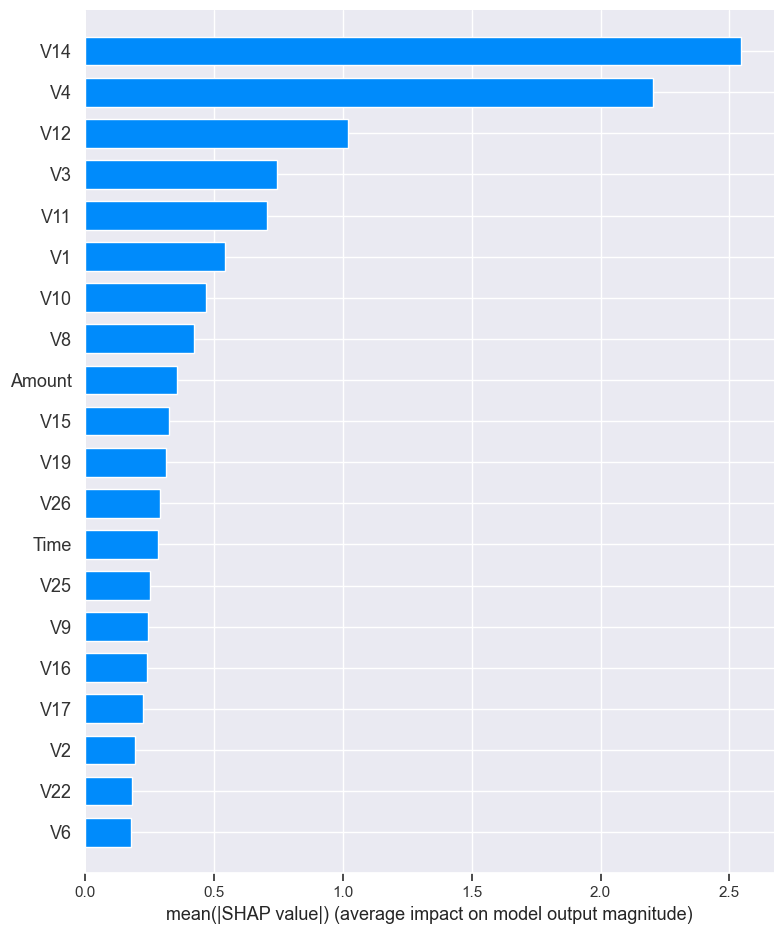

In [51]:
statement_symbol("*", "XGBOOST SHAP BAR CHART EXPLANATION FOR EACH FEATURES IMPORTANCE", 22)
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [64]:
import joblib

joblib.dump(log_model, "models/model.pkl")
model = joblib.load("models/model.pkl")

<h3>Executive Summary</h3>

<p>Fraud is extremely rare → high imbalance</p>

<p>SMOTE and class weights improve detection</p>

XGBoost or Random Forest perform best

Precision-Recall curve is the most important metric

SHAP provides interpretable insights